# This notebook plots filter match results for different initializations (Supplementary Fig. 5a)

In [17]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
%matplotlib inline

### Plot CNN-deep's motif match to JASPAR for different initializations for Relu and Exponential activations

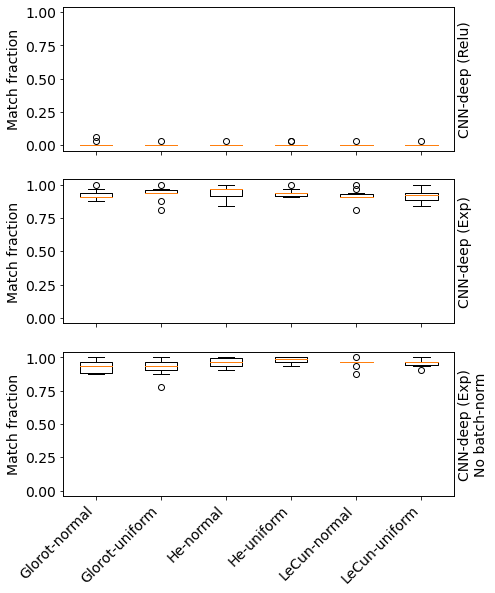

In [32]:

initializations = ['glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_normal', 'lecun_uniform']

initial_names = ['Glorot-normal', 'Glorot-uniform', 'He-normal', 'He-uniform', 'LeCun-normal', 'LeCun-uniform']

activations = ['relu', 'exp']
activation_names = ['Relu', 'Exponential']


results_path = os.path.join('../../results', 'initialization')
file_path = os.path.join(results_path, 'intialization_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
fig = plt.figure(figsize=(7,9))
ax = plt.subplot(3,1,1)
vals = []
for thresh in initializations:
    vals.append(results['relu'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-.04, 1.04])
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Relu)', fontsize=14)

ax = plt.subplot(3,1,2)
vals = []
for thresh in initializations:
    vals.append(results['exp'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.ylim([-.04, 1.04])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
ax.set_xticklabels([])

ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)', fontsize=14)


results_path = '../../results'

file_path = os.path.join(results_path, 'initialization_nobn', 'intialization_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
ax = plt.subplot(3,1,3)
vals = []
for thresh in initializations:
    vals.append(results['exp'][thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-.04, 1.04])
plt.xticks(range(1,len(initial_names)+1), initial_names, fontsize=14, rotation=45, ha="right");
ax.yaxis.tick_right()
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel('CNN-deep (Exp)\nNo batch-norm', fontsize=14)

outfile = os.path.join(results_path, 'filter_thresh.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

